[*********************100%***********************]  1 of 1 completed


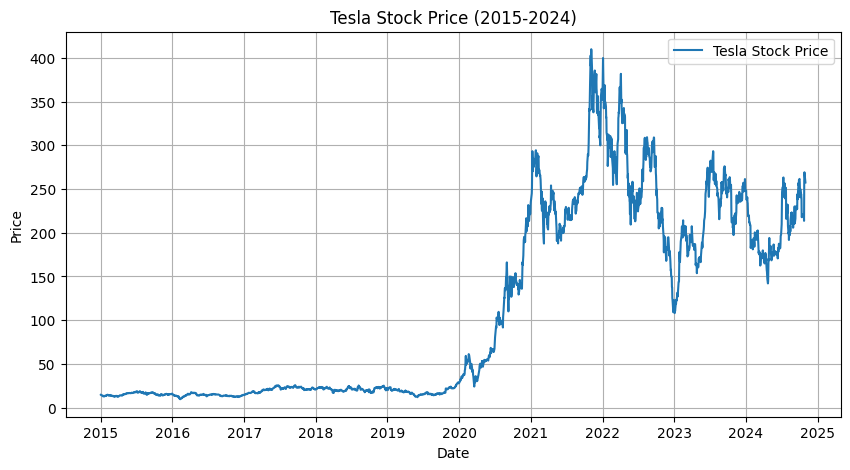

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch Tesla stock data
data = yf.download('TSLA', start='2015-01-01', end='2024-10-31')

# Use the 'Close' column for the forecasting
tsla_data = data['Close']

# Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(tsla_data) * 0.8)
train, test = tsla_data[:train_size], tsla_data[train_size:]

# Plot the data to visualize
plt.figure(figsize=(10, 5))
plt.plot(tsla_data, label='Tesla Stock Price')
plt.title('Tesla Stock Price (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


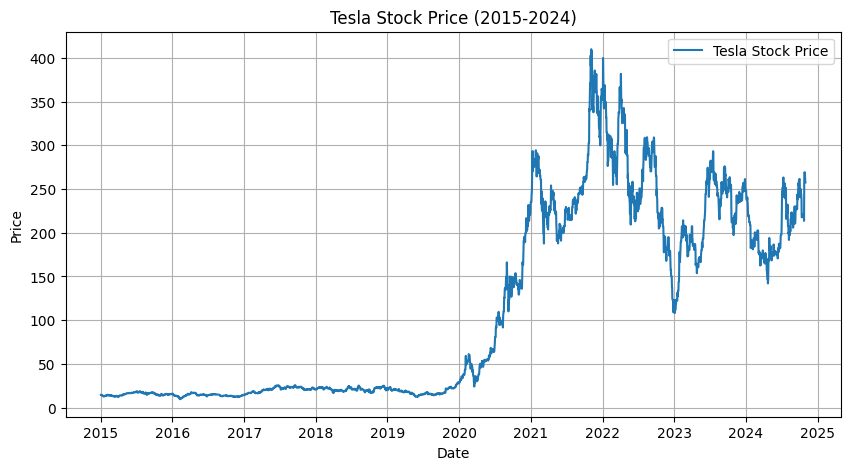

In [9]:


# Ensure the index has a frequency (daily frequency)
tsla_data = data['Close']
tsla_data = tsla_data.asfreq('D', method='pad')  # 'pad' fills missing values with the last valid observation

# Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(tsla_data) * 0.8)
train, test = tsla_data[:train_size], tsla_data[train_size:]

# Plot the data to visualize
plt.figure(figsize=(10, 5))
plt.plot(tsla_data, label='Tesla Stock Price')
plt.title('Tesla Stock Price (2015-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06102D+00    |proj g|=  6.37243D-02


 This problem is unconstrained.



At iterate    5    f=  2.94049D+00    |proj g|=  2.09300D-02

At iterate   10    f=  2.93274D+00    |proj g|=  3.64071D-02

At iterate   15    f=  2.92912D+00    |proj g|=  1.63441D-03

At iterate   20    f=  2.92911D+00    |proj g|=  5.88591D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     20     23      1     0     0   5.886D-06   2.929D+00
  F =   2.9291056465908802     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


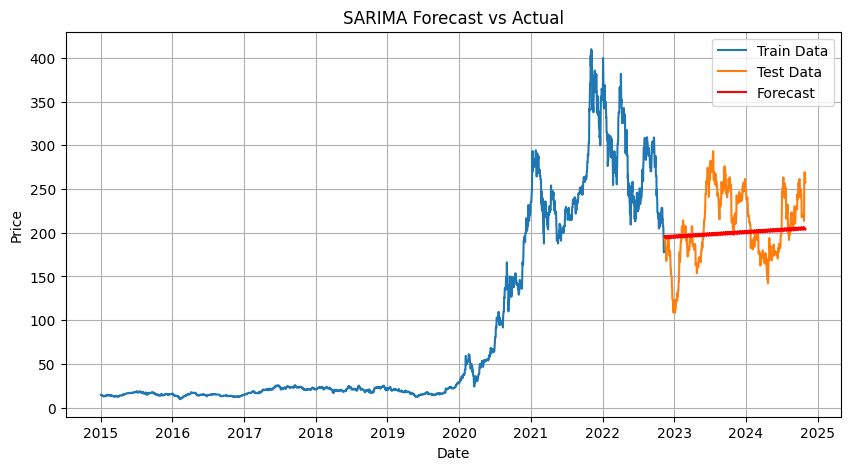

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA Model (Seasonal ARIMA)
sarima_model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))  
sarima_model_fit = sarima_model.fit()


# Forecast the next 20 values (test period)
forecast_steps = len(test)
forecast = sarima_model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast', color='red')
plt.legend()
plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()
